In [0]:
#For Google Collab
from google.colab import drive, auth
from googleapiclient.discovery import build
#For data manipulation
import numpy as np 
import pandas as pd 
import random
#For Plotting
import matplotlib.pyplot as plt
#For Modeling
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import optimizers, regularizers

In [6]:
# Load the Drive helper and mount
# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
auth.authenticate_user()

In [0]:
drive_service = build('drive', 'v3')

In [0]:
#Create variable for image and batch size along with number of epochs committing to for model
height = 224
width = 224
batch_size = 32

train = ImageDataGenerator(rescale = 1/.255,rotation_range=30,horizontal_flip=True)
test = ImageDataGenerator(rescale=1/.255,rotation_range=30,horizontal_flip=True)

In [9]:
#Seting up train, test, and val sets for model

train_set = train.flow_from_directory('../content/drive/My Drive/Chest_X_rays/All_Chest/train'
                                      ,target_size=(width,height), 
                                      batch_size=batch_size,
                                      class_mode='categorical',
                                     seed = 122)
test_set = train.flow_from_directory('../content/drive/My Drive/Chest_X_rays/All_Chest/test'
                                      ,target_size=(width,height), 
                                      batch_size=batch_size,
                                      class_mode='categorical',
                                    seed = 122)
val_set = train.flow_from_directory('../content/drive/My Drive/Chest_X_rays/All_Chest/val'
                                      ,target_size=(width,height), 
                                      batch_size=batch_size,
                                      class_mode='categorical',                                   
                                    seed = 122)

Found 4747 images belonging to 3 classes.
Found 1885 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [10]:
#Model
model = Sequential()

#Input layer 1
model.add(Conv2D(128,(3,3),input_shape=(height,width,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

#Hidden layer 2
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#Hidden layer 3
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

#Hidden layer 4
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1,1)))

#Hidden layer 5
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1,1)))

#Hidden layer 6
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())

#Output layer
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=3,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 128)     3584      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 128)     147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 220, 220, 128)     512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 128)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 128)     147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 106, 106, 128)     147584    
__________

In [19]:
batch_size = 32
epochs = 10

adam = optimizers.adam(lr=0.0001) #, decay=1e-6, momentum=0.9, nesterov=True

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

rt=ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=1, verbose=1, mode='auto', min_delta=0.01, cooldown=1, min_lr=.00000000001)

history = model.fit_generator(train_set, steps_per_epoch=25, epochs=epochs, validation_steps=50, verbose=1, validation_data=test_set, callbacks = [rt])
history

Epoch 1/10
25/25 [==============================] - 95s 4s/step - loss: 0.9728 - acc: 0.6826 - val_loss: 15.8385 - val_acc: 0.0157
Epoch 2/10
25/25 [==============================] - 76s 3s/step - loss: 0.6169 - acc: 0.8100 - val_loss: 8.4703 - val_acc: 0.1747
Epoch 3/10
25/25 [==============================] - 78s 3s/step - loss: 0.3785 - acc: 0.8762 - val_loss: 1.3323 - val_acc: 0.7226
Epoch 4/10
25/25 [==============================] - 73s 3s/step - loss: 0.2432 - acc: 0.9075 - val_loss: 1.0386 - val_acc: 0.8094
Epoch 5/10
25/25 [==============================] - 76s 3s/step - loss: 0.2689 - acc: 0.8938 - val_loss: 0.5095 - val_acc: 0.8203
Epoch 6/10
25/25 [==============================] - 73s 3s/step - loss: 0.2712 - acc: 0.8837 - val_loss: 0.3461 - val_acc: 0.8698
Epoch 7/10
25/25 [==============================] - 78s 3s/step - loss: 0.2317 - acc: 0.8991 - val_loss: 0.3669 - val_acc: 0.8478

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 8

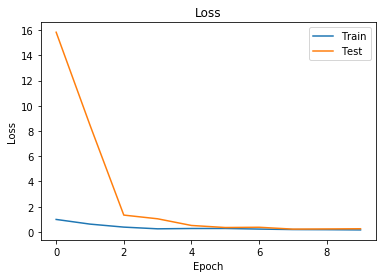

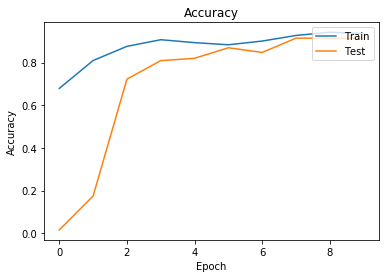

In [20]:
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.legend(loc = 'upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss')
plt.show()

plt.plot(history.history['acc'], label = 'Train')
plt.plot(history.history['val_acc'], label = 'Test')
plt.legend(loc = 'upper right')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.show()